# Example 10: Alternative RVT Peak Factor Calculators

In [ ]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pyrvt

import pystrata

%matplotlib inline

In [ ]:
# Increased figure sizes
plt.rcParams["figure.dpi"] = 120

In [ ]:
osc_freqs = np.logspace(-1, 2, num=91)

In [ ]:
peak_calcs = [
    pyrvt.peak_calculators.CartwrightLonguetHiggins1956(),
    pyrvt.peak_calculators.Vanmarcke1975(),
]
mags = [5, 6, 7]

# Create CLH and V peak factor motions
motions = [
    pystrata.motion.SourceTheoryRvtMotion(
        mag, 20, "wna", depth=8, stress_drop=100, peak_calculator=pc
    )
    for pc, mag in itertools.product(peak_calcs, mags)
]

# Create WR peak factor motions.
motions += [
    pystrata.motion.SourceTheoryRvtMotion(
        mag,
        20,
        "wna",
        depth=8,
        stress_drop=100,
        peak_calculator=pyrvt.peak_calculators.WangRathje2018("wna", mag, 20),
    )
    for mag in mags
]

In [ ]:
for m in motions:
    m.calc_fourier_amps(freqs=np.logspace(-2, 2, 1024))

AttributeError: module 'numpy' has no attribute 'trapezoid'

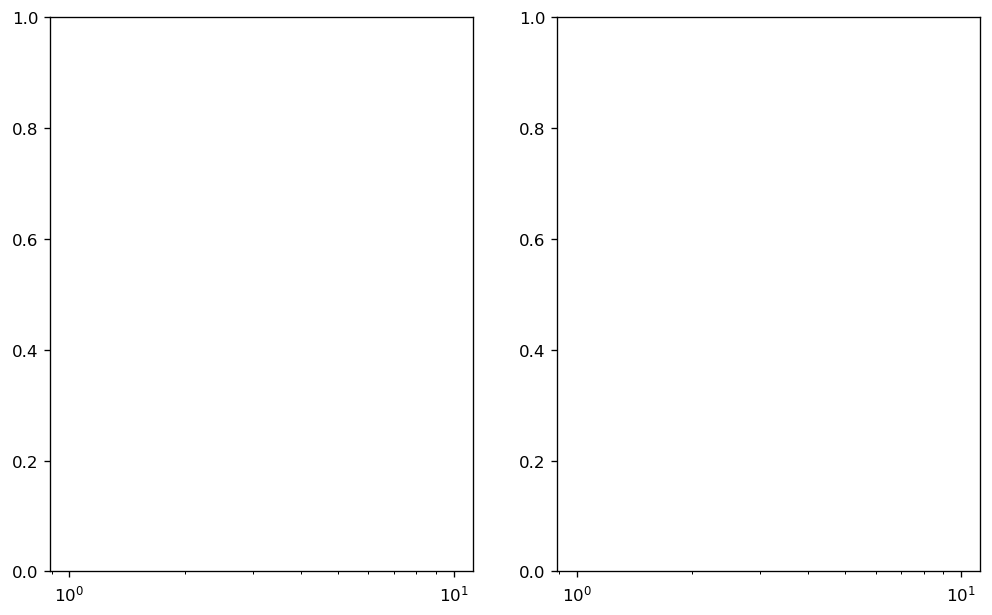

In [ ]:
fig, axes = plt.subplots(
    ncols=2,
    sharex=True,
    sharey=False,
    subplot_kw={"xscale": "log"},
    figsize=(10, 6),
)

for m in motions:
    osc_resps = m.calc_osc_accels(osc_freqs)
    for ax in axes:
        ax.plot(
            osc_freqs, osc_resps, label=f"M{m.magnitude}, {m.peak_calculator.ABBREV}"
        )

axes[0].set(ylabel="5%-Damped, Spectral Accel. (g)", yscale="linear")
axes[1].set(yscale="log")
plt.setp(axes, xlabel="Frequency (Hz)")

ax.legend()
fig.tight_layout()